## Group Project Proposal

## Heart Disease

## Introduction

<img align="left" src="https://domf5oio6qrcr.cloudfront.net/medialibrary/5042/n0318g16207256840245.jpg" width="200"/>

*image source: https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk*

**Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal**
- Heart disease is a variety of conditions that effect the heart, while angina specifically is a type of discomfort or chest pain that results when one’s heart muscles don’t get enough oxygen from their blood. 

**Clearly state the question you will try to answer with your project**
- Is there a target audience for each chest pain type? 

**Identify and describe the dataset that will be used to answer the question**
- The dataset contains patient chart data provided by physicians from 4 different cardiovascular clinics in Hungary, Switzerland and the United States. Processed data donated on July 1st, 1998 contains 14 different variables concerning patient information and factors that affect heart disease. 

## Preliminary exploratory data analysis

**Loading R libraries**

In [1]:
### Run the R libraries 
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows
options(repr.plot.width=10, repr.plot.height=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Reading the data into R**

In [19]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) 
       
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "num")
cleveland_data <- cleveland_data |>
mutate(num = as_factor(num))

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Filtering the na and all the missing values** 

We can see that only ca and thal columns has the header of chr and every other columns are dbl. It tells us that only ca and thal has the missing value since we know that the missing value is represent by '?' in this dataset. We can then filter the '?' out of these two columns, and use the drop_na() to make sure we drop all the na values.

In [20]:
filtered_data <- cleveland_data |>
filter(ca != "?", thal != "?")|>
drop_na()


filtered_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**For our convenience, we can then mutate the num columns so that we combine the number 1 2 3 4 to 1. since 1 2 3 4 means the same thing.**

In [52]:
mutate_data <- filtered_data |>
mutate(num = ifelse(num == 0, 0, 1)) |>
mutate(num = as_factor(num))


mutate_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Change the column type**

Once we clear the missing values we can mutate the ca and thal columns from chr to numeric.

In [54]:
final_data <- mutate_data |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))

final_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Then we can split the data into training and testing data

In [56]:
heart_split <- initial_split(final_data, prop = 0.75, strata = cp)  
heart_train <- training(chest_pain_split)   
heart_test <- testing(chest_pain_split)

heart_train
heart_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
44,1,4,120,169,0,0,144,1,2.8,3,0,6,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


**Summaize data**

In [57]:
count_sex <- heart_train|>
    group_by(sex)|>
    summarize(n = n())

count_fbs <- heart_train|>
    group_by(fbs)|>
    summarize(n = n())

count_restecg <- heart_train|>
    group_by(restecg)|>
    summarize(n = n())

count_exang <- heart_train|>
    group_by(exang)|>
    summarize(n = n())

count_slope <- heart_train|>
    group_by(slope)|>
    summarize(n = n())

count_ca <- heart_train|>
    group_by(ca)|>
    summarize(n = n())

count_thal <- heart_train|>
    group_by(thal)|>
    summarize(n = n())

count_cp <- heart_train|>
    group_by(cp)|>
    summarize(n = n())

count_sex
count_fbs
count_restecg
count_exang
count_slope
count_ca
count_thal
count_cp

sex,n
<dbl>,<int>
0,66
1,156


fbs,n
<dbl>,<int>
0,189
1,33


restecg,n
<dbl>,<int>
0,112
1,4
2,106


exang,n
<dbl>,<int>
0,146
1,76


slope,n
<dbl>,<int>
1,101
2,105
3,16


ca,n
<dbl>,<int>
0,133
1,49
2,25
3,15


thal,n
<dbl>,<int>
3,116
6,13
7,93


cp,n
<dbl>,<int>
1,16
2,35
3,62
4,109


In [58]:
mean_data <- heart_train|>
    select(age,trestbps,chol,thalach,oldpeak)|>
    summarize(across(age:oldpeak, mean, na.rm = TRUE))
mean_data

age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.36937,132.0721,246.018,149.4279,1.079279


**Discover the distribution of heart disease**

In [59]:
counting_types <- heart_train |>
    group_by(num)|>
    summarize(types_count = n()) 
counting_types

num,types_count
<fct>,<int>
0,117
1,105


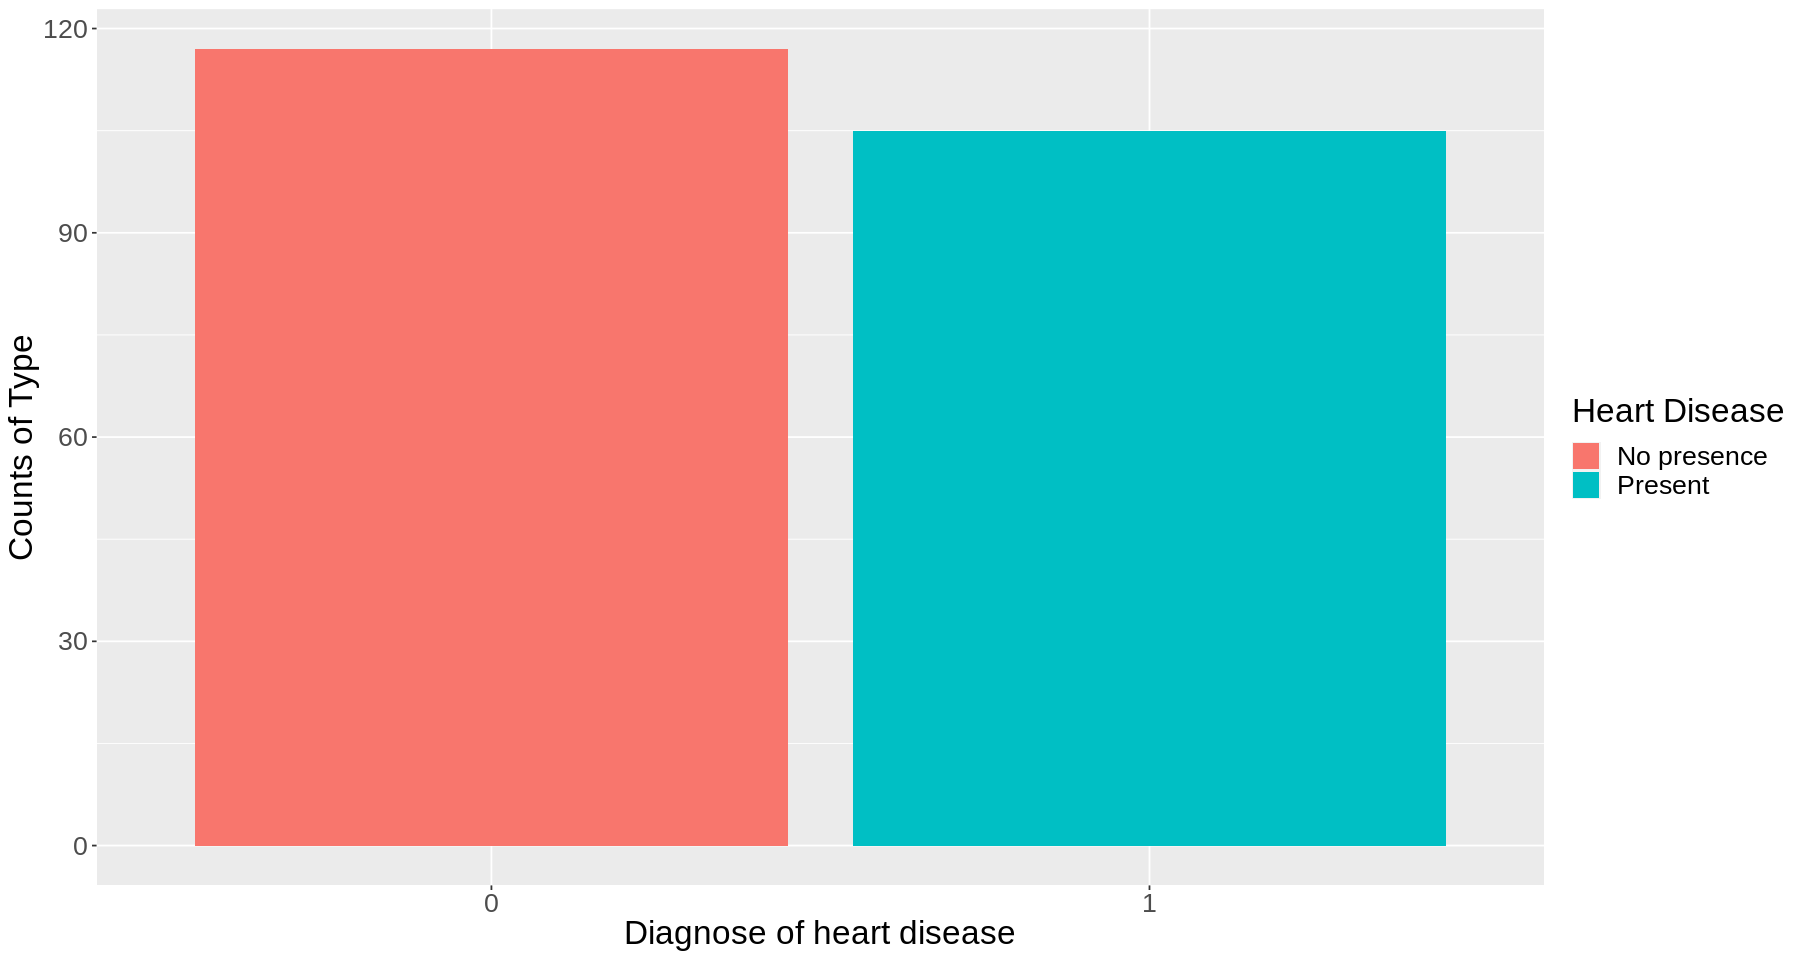

In [60]:
type_vs_num <- counting_types |>
    ggplot(aes(x = num, y = types_count, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "Diagnose of heart disease",y = "Counts of Type", color = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("No presence", "Present")) +
    theme(text = element_text(size = 20))
type_vs_num

We can see from the graph that the four different types are not evenly distributed in the data set. What we can do in the future is to use `library(themis)` to  use the `up_sampling()` function in the recipe to balance the distribution of different types. Neeeeeeeeeed Change !

**Visualizing data**

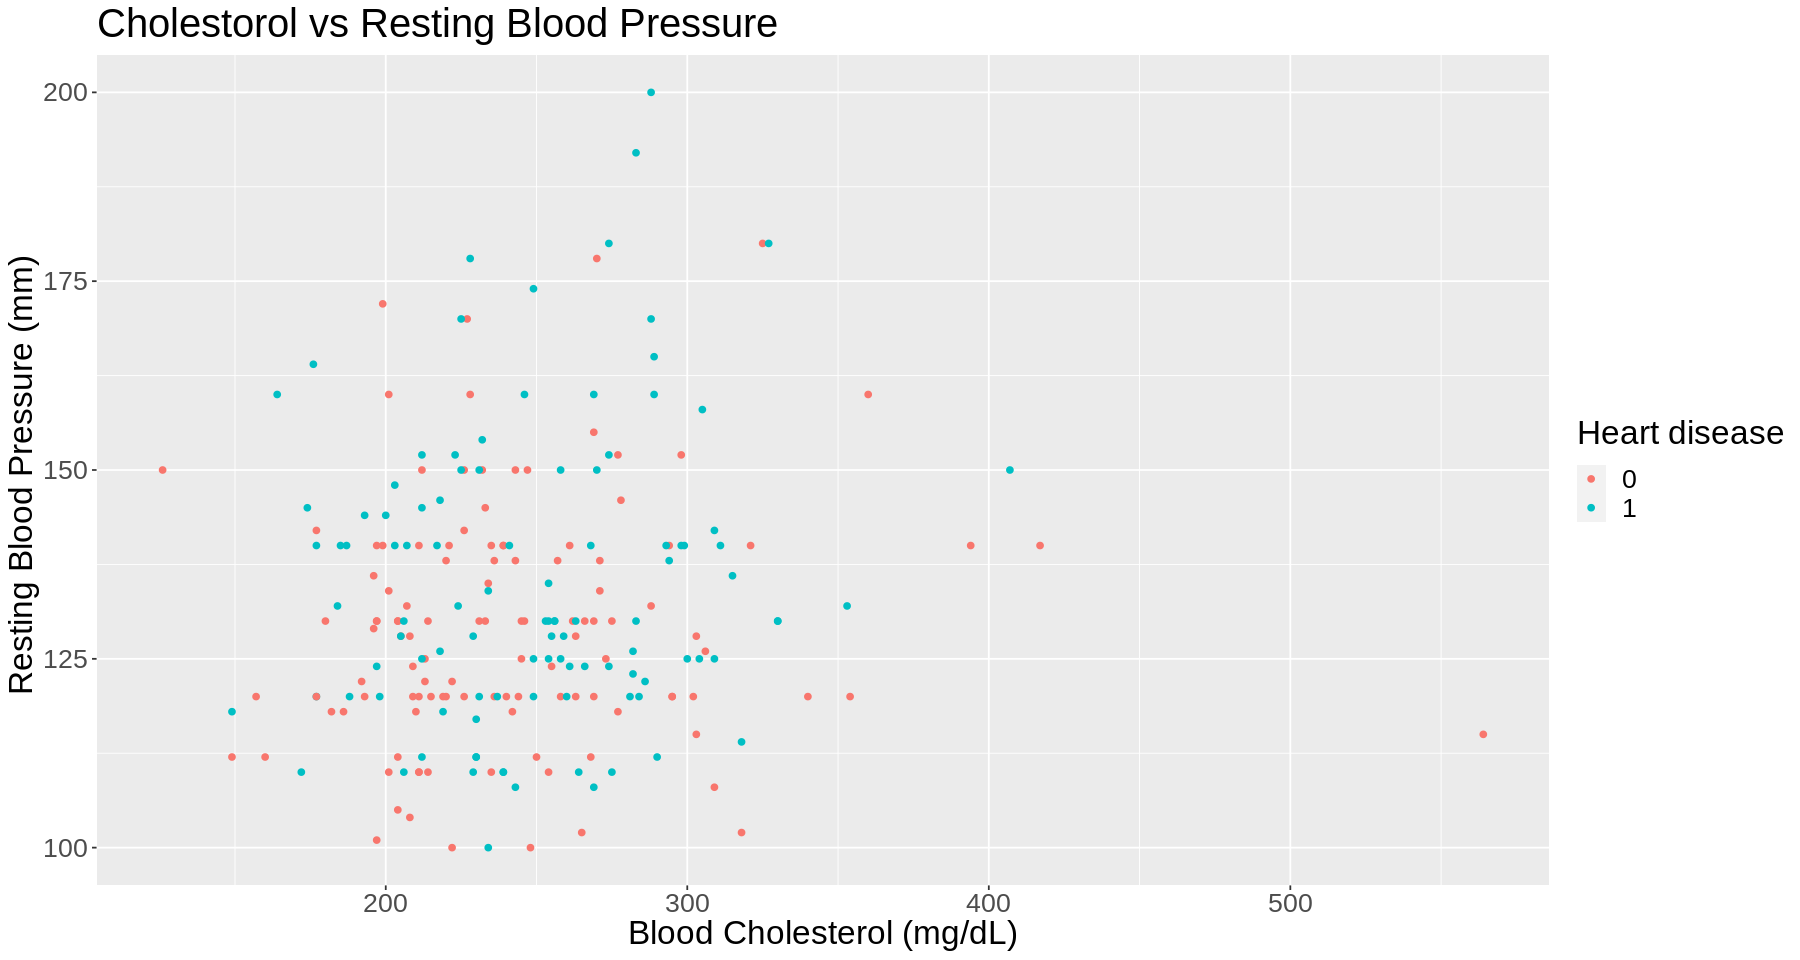

In [61]:
options(repr.plot.width = 15, repr.plot.height = 8) 

trestbps_vs_chol <- heart_train |>
    ggplot(aes(x = chol , y = trestbps, color = num))+
    geom_point()+
    labs(x = "Blood Cholesterol (mg/dL)", y = "Resting Blood Pressure (mm) ", color = "Heart disease", labels = c("No presence", "Present")) +
    ggtitle("Cholestorol vs Resting Blood Pressure")+
    theme(text = element_text(size = 20))
trestbps_vs_chol

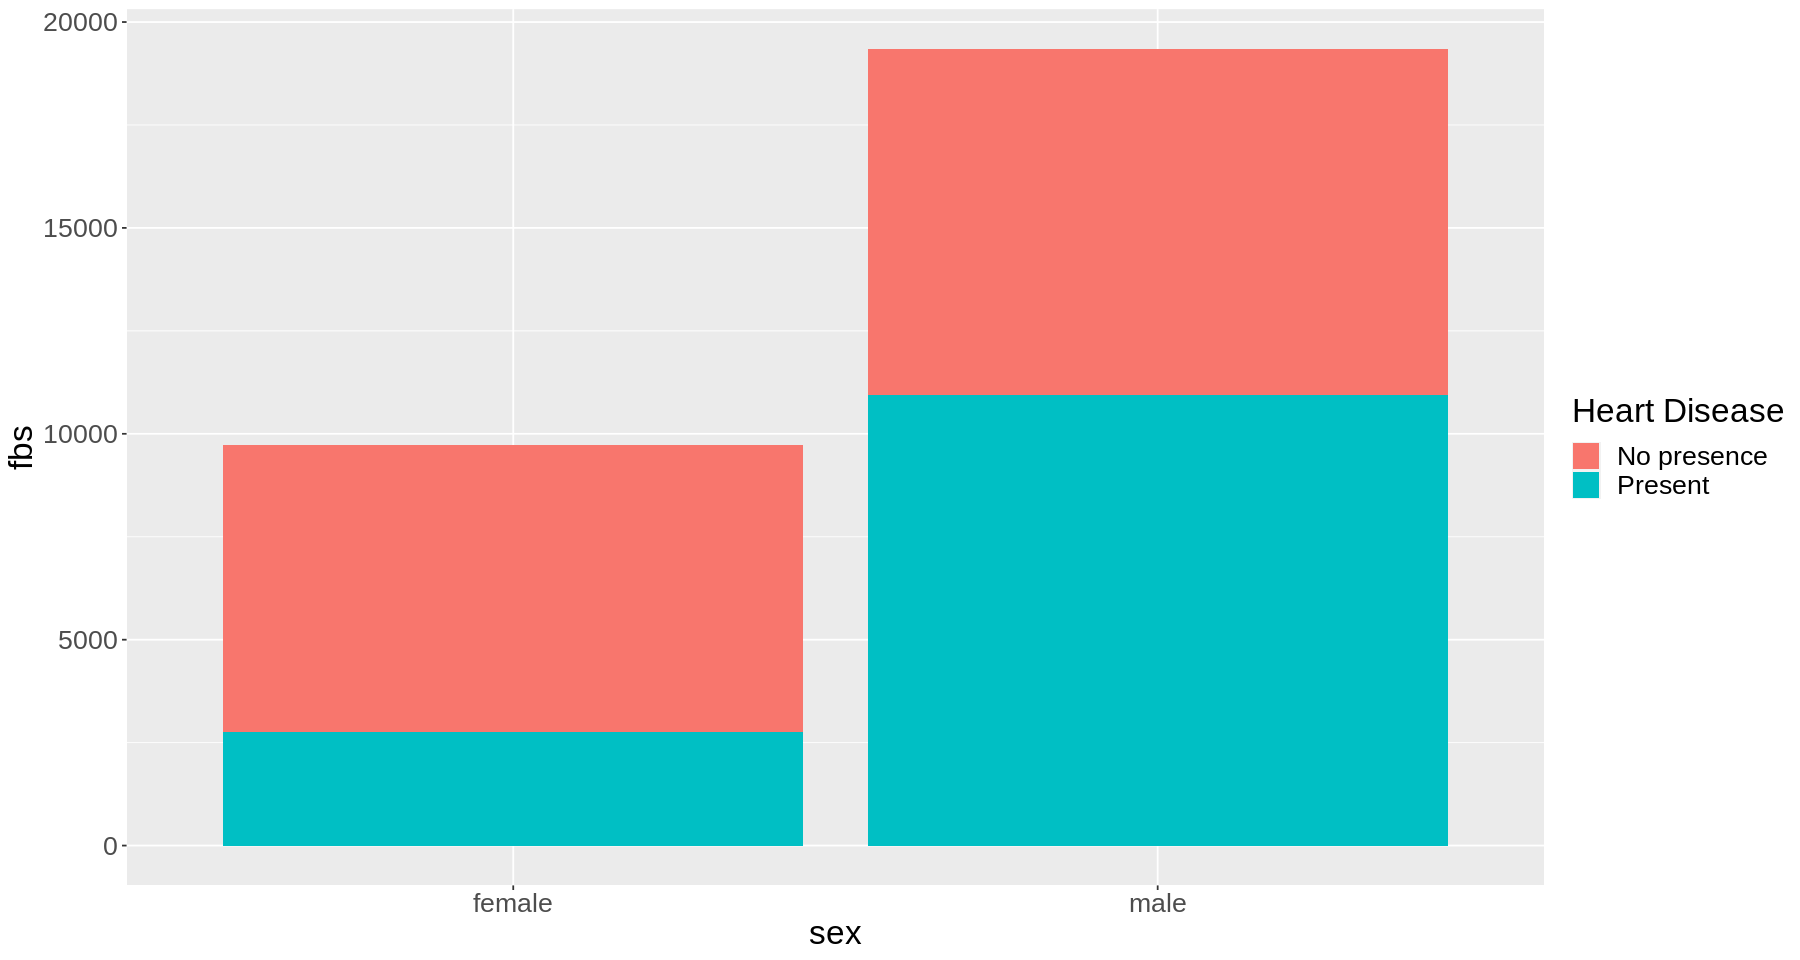

In [62]:
age_plot  <- heart_train |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = trestbps, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "fbs", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("No presence", "Present")) +
    theme(text = element_text(size = 20))
sex_vs_fbs

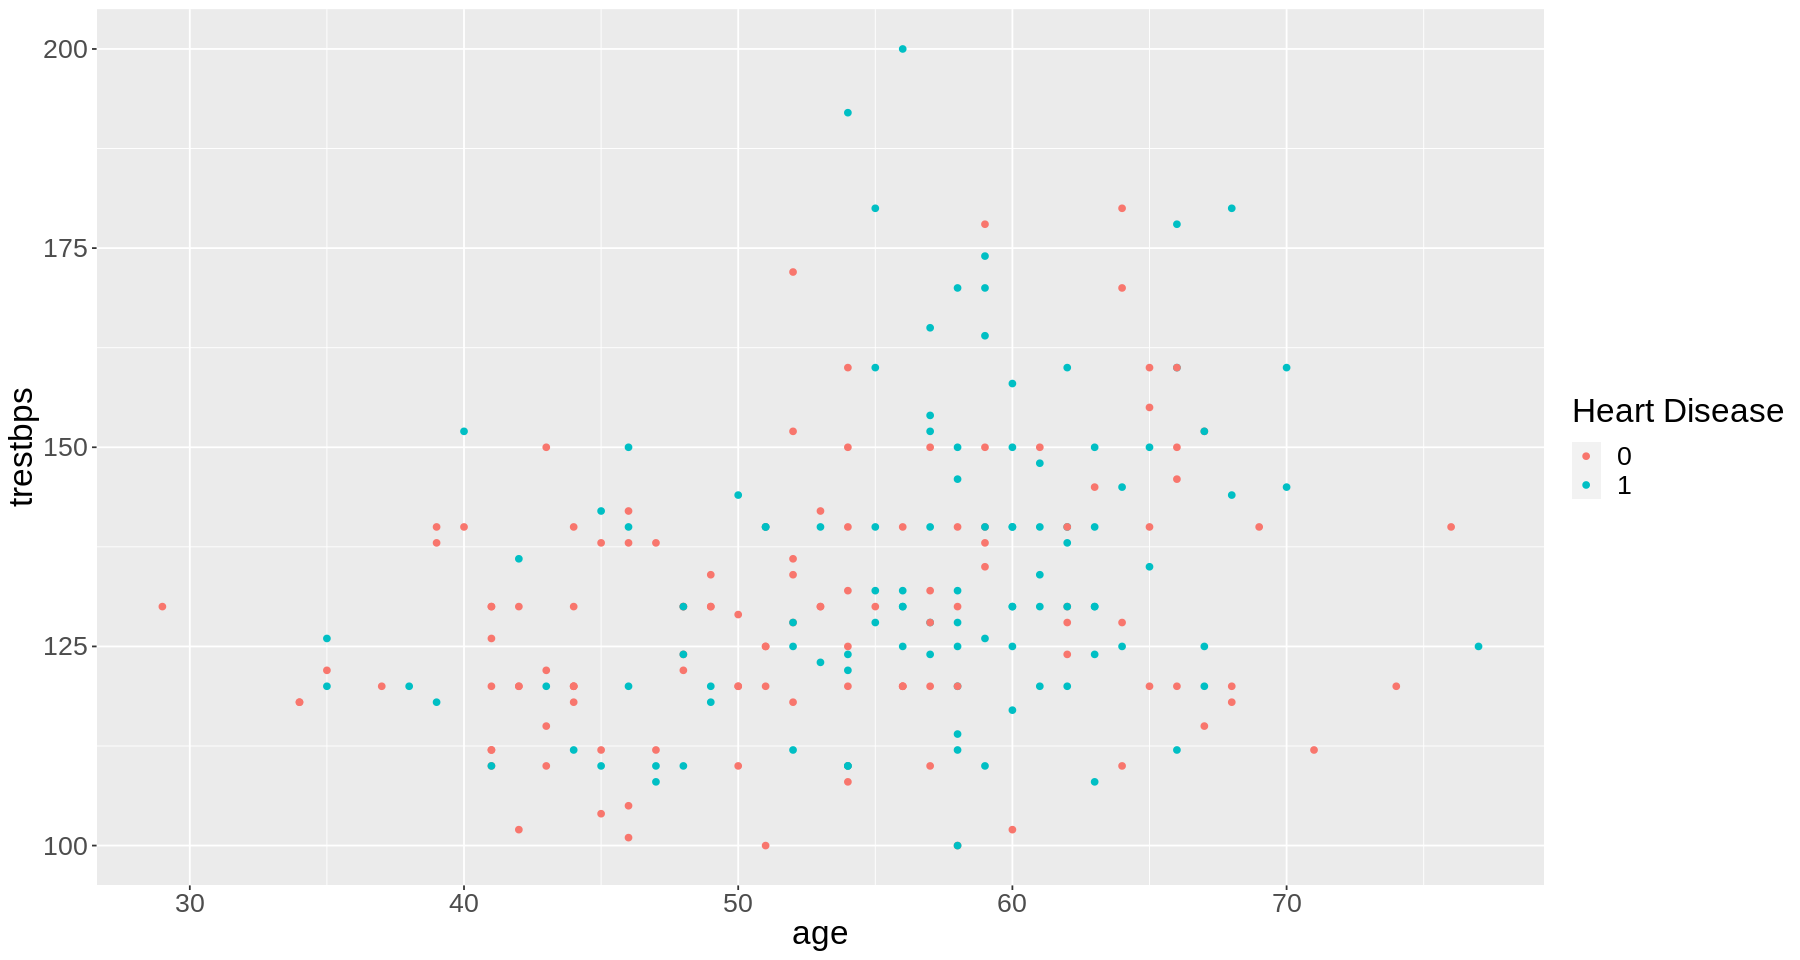

In [63]:
trestbps_vs_age <- heart_train |>
    ggplot(aes(x = age , y = trestbps, color = num)) +
    geom_point() +
    labs(x = "age", y = "trestbps", color = "Heart Disease") +
    theme(text = element_text(size = 20))
trestbps_vs_age

Here, we visualize the distribution of chest pain types of males vs females.

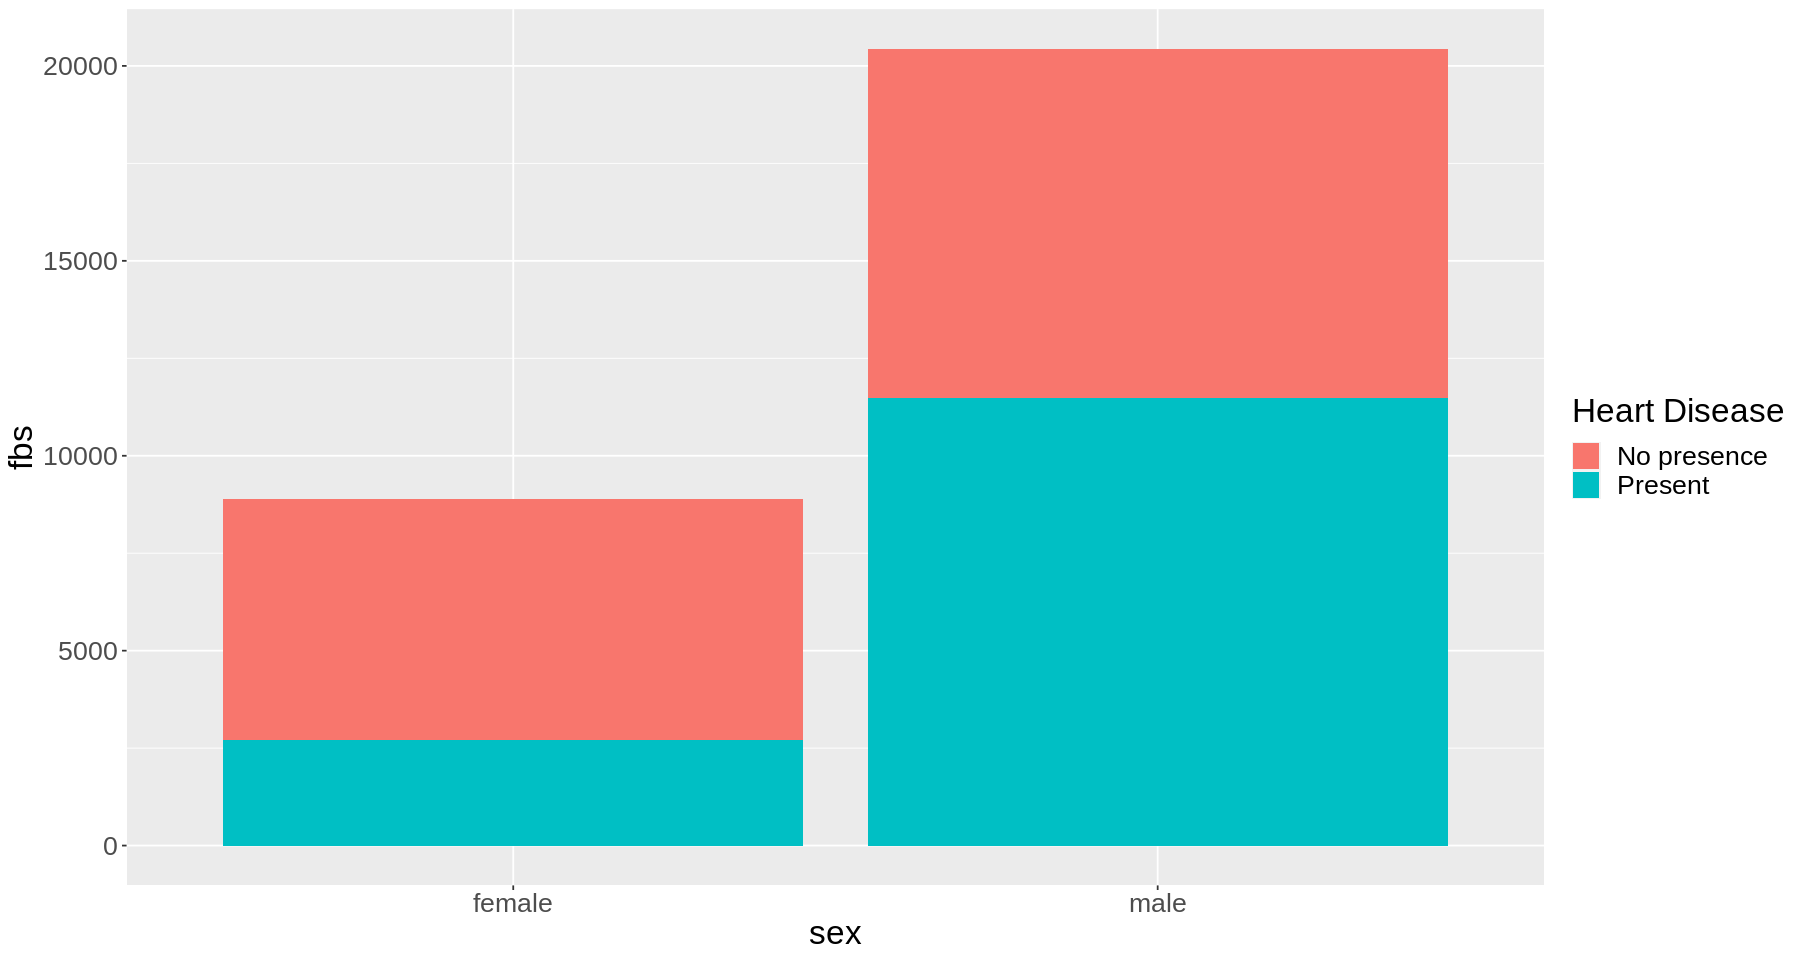

In [64]:
sex_vs_fbs  <- heart_train |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = trestbps, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "fbs", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("No presence", "Present")) +
    theme(text = element_text(size = 20))
sex_vs_fbs

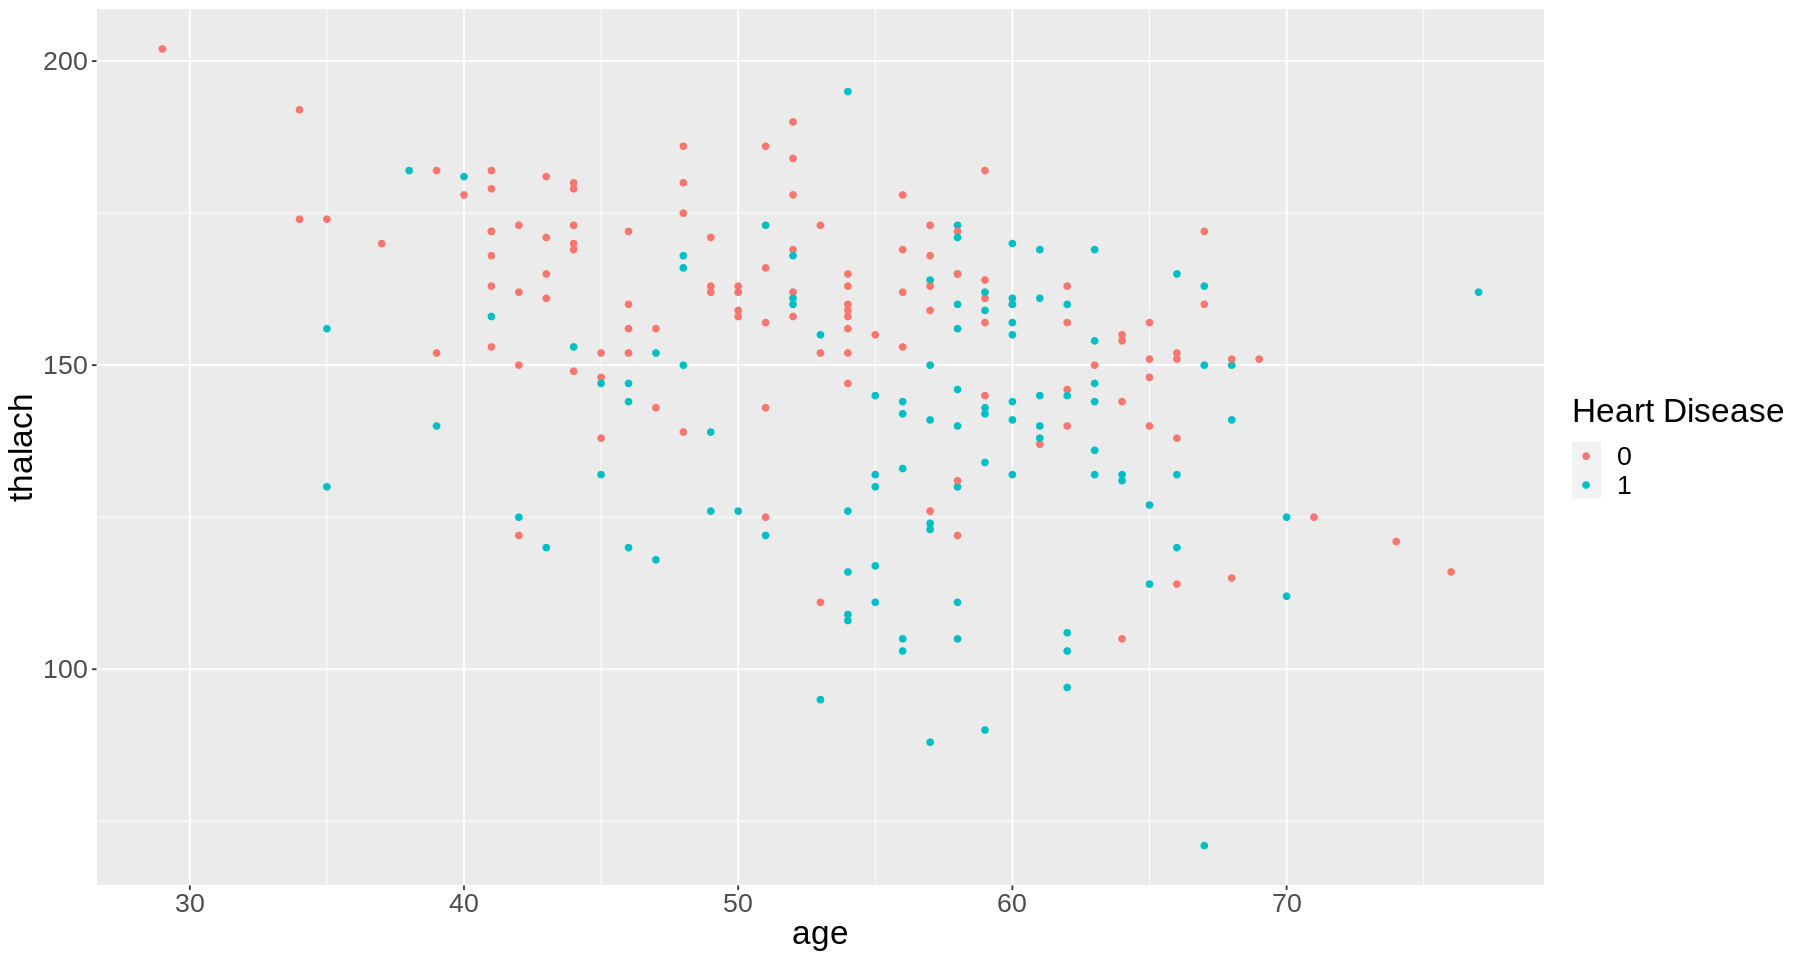

In [65]:
age_vs_thalach <- heart_train |>
    ggplot(aes(x = age , y = thalach, color = num)) +
    geom_point()+
    labs(x = "age", y = "thalach", color = "Heart Disease") +
    theme(text = element_text(size = 20))
age_vs_thalach

**Overlaying distribution of the predictor variable**

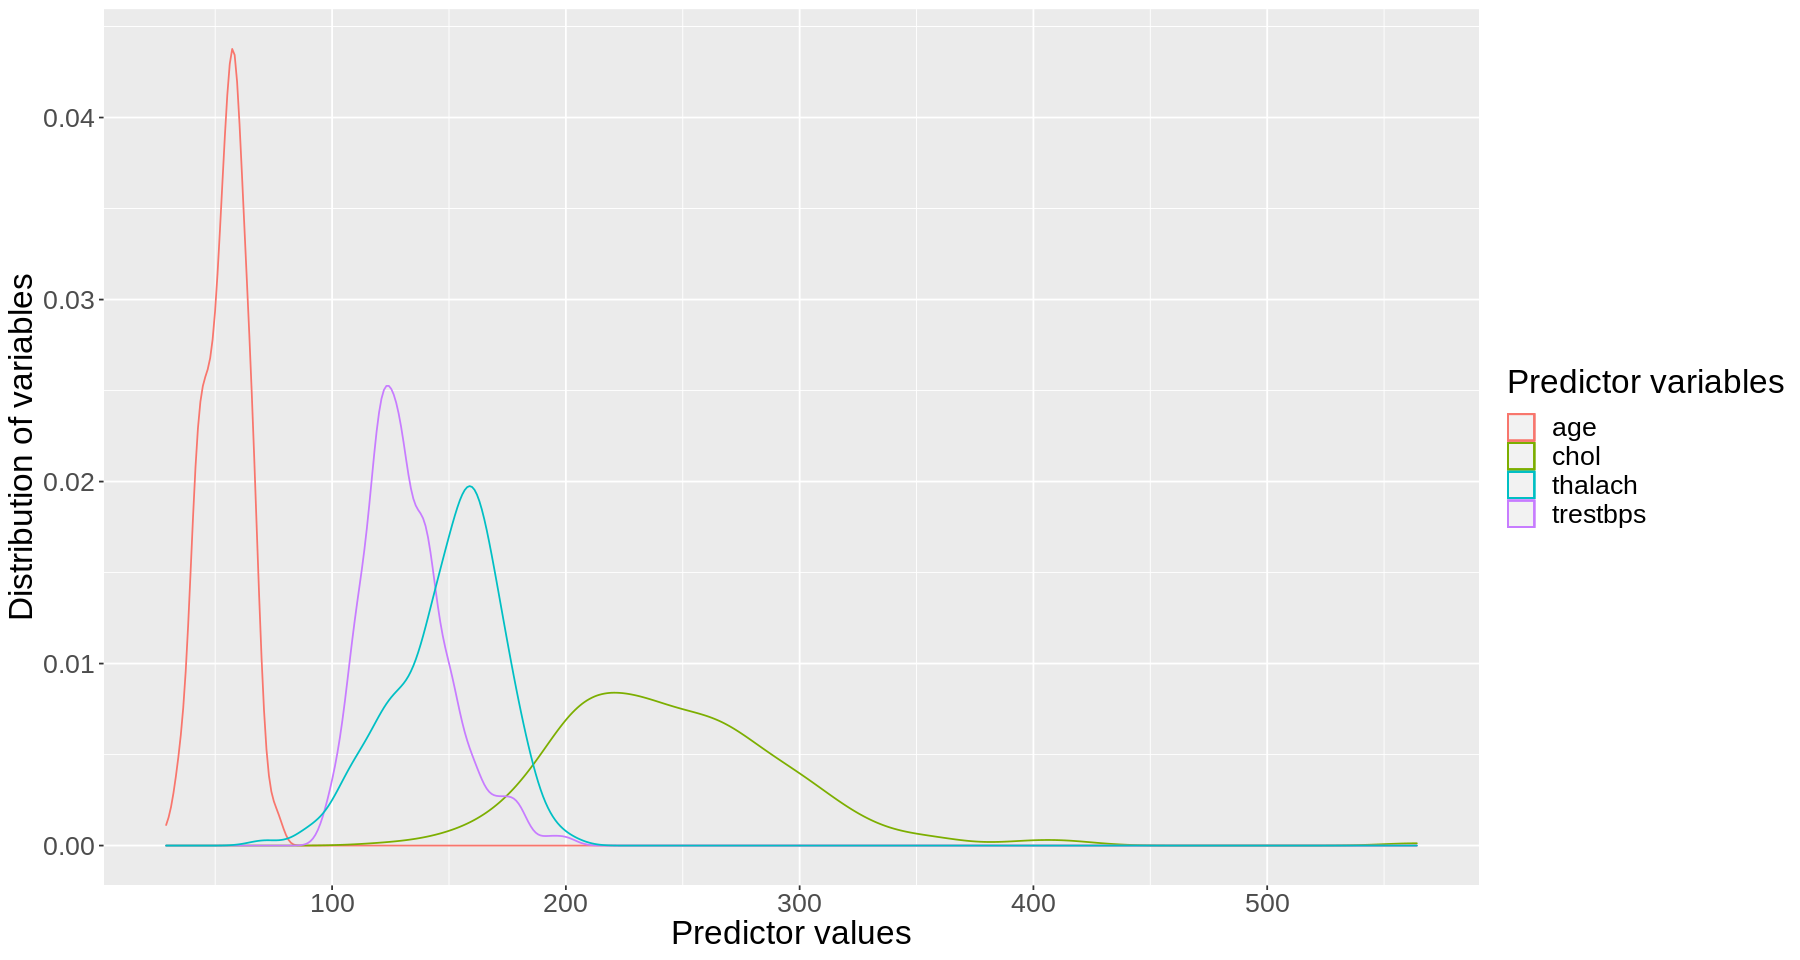

In [66]:
ggplot(heart_train) + 
    geom_density(aes(x=age, color = 'age')) +
    geom_density(aes(x=chol, color = 'chol')) +
    geom_density(aes(x=trestbps, color = 'trestbps')) +
    geom_density(aes(x=thalach, color = 'thalach'))+
    labs(x = "Predictor values", y = "Distribution of variables", color = "Predictor variables") +
    scale_fill_discrete(name = "Chest Pain Type", labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")) +
    theme(text = element_text(size = 20))

## Methods

## Expected outcomes and significance